In [27]:
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [3]:
df1 = pd.read_csv("3.1-data-sheet-guvi-courses.csv")
df1.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [4]:
df1.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

### Handling missing data

In [5]:
df1.dropna(inplace= True)

In [6]:
df1.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
df1.shape

(3676, 12)

In [8]:
df1.duplicated().any()

False

In [9]:
df1.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

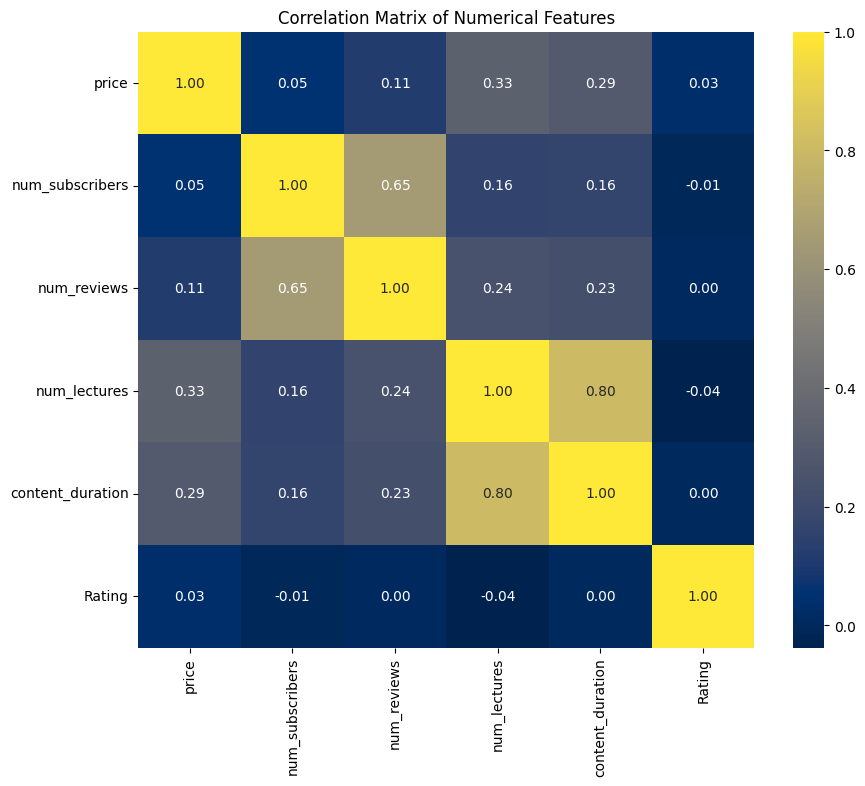

In [10]:
numerical_features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'Rating']

# Compute the correlation matrix
correlation_matrix = df1[numerical_features].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

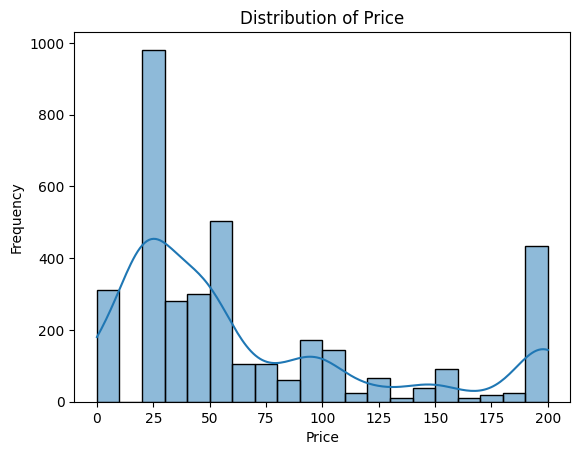

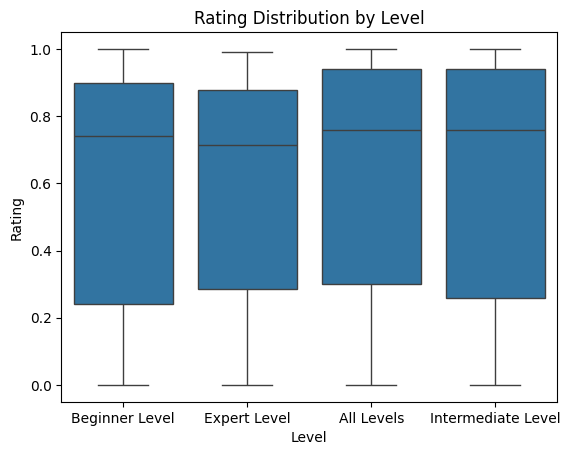

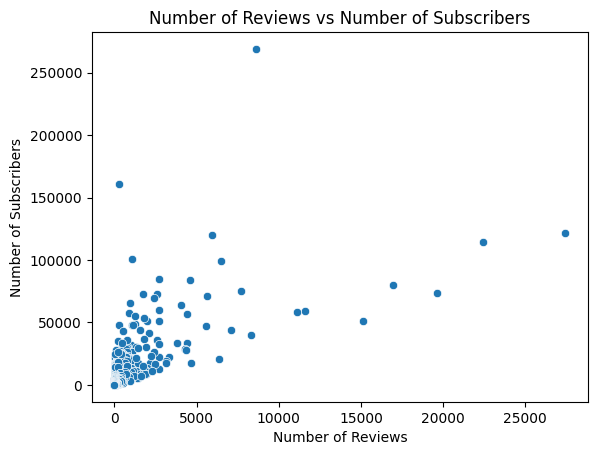

In [11]:
# Histograms of numerical features
sns.histplot(df1['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'Rating' grouped by 'level'
sns.boxplot(x='level', y='Rating', data=df1)
plt.title('Rating Distribution by Level')
plt.xlabel('Level')
plt.ylabel('Rating')
plt.show()

# Scatter plot of 'num_reviews' vs 'num_subscribers'
sns.scatterplot(x='num_reviews', y='num_subscribers', data=df1)
plt.title('Number of Reviews vs Number of Subscribers')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Subscribers')
plt.show()


In [12]:
### Removing features 
df2 = df1.drop(columns= ["course_id", "course_title", "url", "published_timestamp"])
df2.head()

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,Subject: Web Development
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,Subject: Web Development
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,Subject: Web Development


In [13]:
df2.level.nunique()

4

In [14]:
df2["level"].unique()

array(['Beginner Level', 'Expert Level', 'All Levels',
       'Intermediate Level'], dtype=object)

In [15]:
from sklearn.preprocessing import OrdinalEncoder

# Reshape the input array into a 2D array
ordinal_categories = ['Beginner Level', 'Intermediate Level', 'Expert Level', 'All Levels']

# Create an instance of OrdinalEncoder with the unique values of the 'level' feature
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories])

# Fit and transform the 'level' feature and store the encoded values in a new column 'encoded_level'
df3 = df2.copy()
level_values = df2[["level"]].values.reshape(-1, 1)
df3["encoded_level"] = ordinal_encoder.fit_transform(level_values)

df3.head()

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,encoded_level
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development,0.0
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development,2.0
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,Subject: Web Development,0.0
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,Subject: Web Development,3.0
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,Subject: Web Development,0.0


In [16]:
df3["subject"].nunique()

4

In [17]:
df3["subject"].unique()

array(['Subject: Web Development', 'Business Finance', 'Graphic Design',
       'Musical Instruments'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df3['encoded_subject'] = label_encoder.fit_transform(df3['subject'])

df3.tail()

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,encoded_level,encoded_subject
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,3.0,2
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,0.0,2
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,3.0,2
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,0.0,2
3679,20.0,0.0,0.0,28.0,All Levels,0.01,2.500000,Musical Instruments,3.0,2


In [19]:
df4 = df3.drop(columns=["level", "subject"])

df4.head()

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,encoded_level,encoded_subject
0,0.0,268923.0,8629.0,45.0,0.82,10.5,0.0,3
1,0.0,161029.0,279.0,27.0,0.69,3.5,2.0,3
2,200.0,121584.0,27445.0,342.0,0.89,43.0,0.0,3
3,0.0,120291.0,5924.0,30.0,0.78,3.0,3.0,3
4,200.0,114512.0,22412.0,304.0,0.55,30.5,0.0,3


In [20]:
X = df4.drop(columns=["Rating"])
X.head()

,price,num_subscribers,num_reviews,num_lectures,content_duration,encoded_level,encoded_subject
0,0.0,268923.0,8629.0,45.0,10.5,0.0,3
1,0.0,161029.0,279.0,27.0,3.5,2.0,3
2,200.0,121584.0,27445.0,342.0,43.0,0.0,3
3,0.0,120291.0,5924.0,30.0,3.0,3.0,3
4,200.0,114512.0,22412.0,304.0,30.5,0.0,3


In [21]:
y = df4["Rating"]
y.head()

0    0.82
1    0.69
2    0.89
3    0.78
4    0.55
Name: Rating, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state= 42)


### Decision Tree Regressor

In [23]:
from math import sqrt
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train, y_train)
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

print("RMSE for training set:", rmse_train)
print("RMSE for testing set:", rmse_test)

RMSE for training set: 0.011065666703449762
RMSE for testing set: 0.34833922746556173


### Random forest

In [25]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

print("RMSE for training set:", rmse_train)
print("RMSE for testing set:", rmse_test)

RMSE for training set: 0.09881128621606683
RMSE for testing set: 0.26422142431359413


In [26]:
ln_reg = LinearRegression()

ln_reg.fit(X_train, y_train)
y_train_pred = ln_reg.predict(X_train)
y_test_pred = ln_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

print("RMSE for training set:", rmse_train)
print("RMSE for testing set:", rmse_test)

RMSE for training set: 0.3307093287958074
RMSE for testing set: 0.32642771003904303


In [28]:
et_reg = ExtraTreeRegressor()
et_reg.fit(X_train, y_train)
y_train_pred = et_reg.predict(X_train)
y_test_pred = et_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

print("RMSE for training set:", rmse_train)
print("RMSE for testing set:", rmse_test)

RMSE for training set: 0.011065666703449762
RMSE for testing set: 0.37338019730447736


#### Concluding that the Descision Tree is the best for this dataset.

In [29]:
X_train.head(), y_train.head()

(      price  num_subscribers  num_reviews  num_lectures  content_duration  \
 3104   50.0           1504.0         15.0          14.0          0.683333   
 2888   25.0             17.0          3.0           8.0          1.000000   
 3200  100.0            567.0         37.0          24.0          1.500000   
 2901   95.0             11.0          0.0          10.0          1.000000   
 1055   85.0            608.0         88.0          48.0          3.500000   
 
       encoded_level  encoded_subject  
 3104            3.0                2  
 2888            3.0                1  
 3200            0.0                2  
 2901            3.0                1  
 1055            3.0                3  ,
 3104    0.71
 2888    0.89
 3200    0.07
 2901    0.94
 1055    0.99
 Name: Rating, dtype: float64)

In [33]:
feature_values = [[50.0, 1504.0, 15.0, 14.0, 0.68333, 3.0, 2]]

dt_reg.predict(feature_values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.71])

In [34]:
feature_values = [[25.0, 17.0, 3.0, 8.0, 1.00, 3.0, 1]]

dt_reg.predict(feature_values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.89])

In [35]:
import pickle

with open('guvi_rating.pkl', 'wb') as f:
    pickle.dump(dt_reg, f)